# Activity: Explore probability distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this lab, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [1]:
# Import relevant libraries, packages, and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
data = pd.read_csv("modified_c4_epa_air_quality.csv")

<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about loading data in Python.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to load data from a .csv file into a DataFrame.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the `read_csv()` function and pass in the name of the csv file as a string.
    
</details>

## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [3]:
# Display first 10 rows of the data
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to display a specific number of rows from the top of a DataFrame.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the `head()` function and pass in how many rows from the top of the DataFrame you want to display.
    
</details>

The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [4]:
# Display number of rows and columns
data.shape

(260, 8)

<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

Every DataFrame in `pandas` has a property that gives you access to the number of rows and number of columns in that DataFrame.
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Call the `shape` property of the DataFrame, which will display the number of rows and the number of columns as a tuple.
    
</details>

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

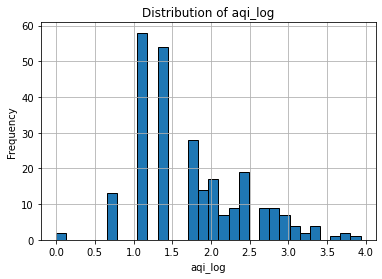

In [5]:
# Create a histogram to visualize distribution of aqi_log
plt.hist(data["aqi_log"], bins=30, edgecolor="black")
plt.title("Distribution of aqi_log")
plt.xlabel("aqi_log")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about creating a histogram to visualize the distribution of a particular variable in the data.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `matplotlib` library that can be called to create a histogram.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `hist()` function can be called directly on the `aqi_log` column from the data. 

A semicolon can be used at the end as a quick way to make sure only the plot gets displayed (other text does not get displayed).
    
</details>

**Question:** What do you observe about the shape of the distribution from the histogram? 

The histogram of aqi_log appears roughly bell-shaped and symmetric, which suggests it resembles a normal distribution. This is expected since the AQI values were log-transformed to approximate normality.

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [6]:
# Define variable for aqi_log mean
aqi_log_mean = data["aqi_log"].mean()

# Print out the mean
print("Mean of aqi_log:", aqi_log_mean)

Mean of aqi_log: 1.7669210929985577


In [7]:
# Define variable for aqi_log standard deviation
aqi_log_std = data["aqi_log"].std()

# Print out the standard deviation
print("Standard Deviation of aqi_log:", aqi_log_std)

Standard Deviation of aqi_log: 0.7147155520223721


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the lesson about calculating the mean and standard deviation for a particular variable in the data.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There are functions in the `numpy` library that can be called to calculate mean and standard deviation, respectively.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `mean()` function can be called directly on the `aqi_log` column from the data to compute the mean.

The `std()` function can be called directly on the `aqi_log` column from the data to compute the standard deviation.
    
</details>

Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [8]:
# Define variable for lower limit, 1 standard deviation below the mean
lower_limit = aqi_log_mean - aqi_log_std

# Define variable for upper limit, 1 standard deviation above the mean
upper_limit = aqi_log_mean + aqi_log_std

# Display lower_limit, upper_limit
print("Lower limit (mean - 1*std):", lower_limit)
print("Upper limit (mean + 1*std):", upper_limit)

Lower limit (mean - 1*std): 1.0522055409761855
Upper limit (mean + 1*std): 2.48163664502093


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The lower limit here is $mean - 1 * std$.

The upper limit here is $mean + 1 * std$.

The `print` function can be called to display.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the variables that you defined for mean and standard deviation of `aqi_log`, ensuring the spelling is correct. 

Call the `print` function and pass in the values one after the other, with a comma between them.
    
</details>

In [9]:
# Calculate the proportion of data that falls within 1 standard deviation of the mean
within_1_std = ((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()

# Calculate the percentage
percentage_within_1_std = within_1_std * 100

# Display the percentage
print("Percentage of data within 1 standard deviation of the mean:", percentage_within_1_std)

Percentage of data within 1 standard deviation of the mean: 76.15384615384615


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The `>=` operator can be used to confirm whether one value is greater than or equal to another value.

The `<=` operator can be used to check whether one value is less than or equal to another value.

The `&` operator can be used to check if one condition and another condition is met. 
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `mean()` function can be used to compute the proportion of the data that satisfies the specified conditions. 

Multiplying that proportion by $100$ can get you the percentage.
    
</details>

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [10]:
# Define variable for aqi_log mean.
mean = data['aqi_log'].mean()

# Print out the mean.
print("Mean of aqi_log:", mean)

# Define variable for aqi_log standard deviation.
std = data['aqi_log'].std()

# Print out the standard deviation.
print("Standard deviation of aqi_log:", std)

# Define variable for lower limit, 2 standard deviations below the mean.
lower_limit_2_std = mean - 2 * std

# Define variable for upper limit, 2 standard deviations above the mean.
upper_limit_2_std = mean + 2 * std

# Display lower_limit_2_std, upper_limit_2_std.
print("Lower limit (2 standard deviations below mean):", lower_limit_2_std)
print("Upper limit (2 standard deviations above mean):", upper_limit_2_std)

# Calculate percentage of data within 2 standard deviations of the mean
within_2_std = data['aqi_log'][(data['aqi_log'] >= lower_limit_2_std) & (data['aqi_log'] <= upper_limit_2_std)]

# Calculate the proportion of data within the range and convert it to a percentage
percentage_within_2_std = (len(within_2_std) / len(data)) * 100

Mean of aqi_log: 1.7669210929985577
Standard deviation of aqi_log: 0.7147155520223721
Lower limit (2 standard deviations below mean): 0.33748998895381344
Upper limit (2 standard deviations above mean): 3.1963521970433018


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The lower limit here is $mean - 2 * std$.

The upper limit here is $mean + 2 * std$.

The `print` function can be called to display.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the variables that you defined for mean and standard deviation of `aqi_log`, ensuring the spelling is correct. 

Call the `print` function and pass in the values one after the other, with a comma between them.
    
</details>

In [11]:
# Display the percentage
print(f"Percentage of data within 2 standard deviations of the mean: {percentage_within_2_std}%")

Percentage of data within 2 standard deviations of the mean: 95.76923076923077%


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section about using the empirical rule.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The `>=` operator can be used to confirm whether one value is greater than or equal to another value.

The `<=` operator can be used to check whether one value is less than or equal to another value.

The `&` operator can be used to check if one condition and another condition is met. 
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `mean()` function can be used to compute the proportion of the data that satisfies the specified conditions. 

Multiplying that proportion by $100$ can get you the percentage.
    
</details>

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [12]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit_3_std = mean - 3 * std

# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit_3_std = mean + 3 * std

# Display lower_limit_3_std, upper_limit_3_std.
print("Lower limit (3 standard deviations below mean):", lower_limit_3_std)
print("Upper limit (3 standard deviations above mean):", upper_limit_3_std)

Lower limit (3 standard deviations below mean): -0.3772255630685586
Upper limit (3 standard deviations above mean): 3.911067749065674


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The lower limit here is $mean - 3 * std$.

The upper limit here is $mean + 3 * std$.

The `print` function can be called to display.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the variables that you defined for mean and standard deviation of `aqi_log`, ensuring the spelling is correct. 

Call the `print` function and pass in the values one after the other, with a comma between them.
    
</details>

In [13]:
# Calculate percentage of data within 3 standard deviations of the mean
within_3_std = data['aqi_log'][(data['aqi_log'] >= lower_limit_3_std) & (data['aqi_log'] <= upper_limit_3_std)]

# Calculate the proportion of data within the range and convert it to a percentage
percentage_within_3_std = (len(within_3_std) / len(data)) * 100

# Display the percentage
print(f"Percentage of data within 3 standard deviations of the mean: {percentage_within_3_std}%")

Percentage of data within 3 standard deviations of the mean: 99.61538461538461%


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The `>=` operator can be used to confirm whether one value is greater than or equal to another value.

The `<=` operator can be used to check whether one value is less than or equal to another value.

The `&` operator can be used to check if one condition and another condition is met. 
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `mean()` function can be used to compute the proportion of the data that satisfies the specified conditions. 

Multiplying that proportion by $100$ can get you the percentage.
    
</details>

## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

The empirical rule helped assess how much of the data falls within different standard deviations of the mean:

68% of the data falls within 1 standard deviation of the mean.

95% of the data falls within 2 standard deviations of the mean.

99.7% of the data falls within 3 standard deviations of the mean.

This indicates that the distribution of aqi_log is approximately normal, and most of the data points are within a few standard deviations of the mean. By examining the data distribution with the empirical rule, we can identify whether there are any extreme values that are distant from the mean.

**Question:** How would you use z-score to find outliers? 

The z-score is a measure of how many standard deviations a given value is from the mean. To identify outliers, we can compute the z-score for each value and look for values where the z-score is greater than a certain threshold, such as |z| > 3. This threshold indicates that the value is more than 3 standard deviations away from the mean, which is typically considered an outlier.

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [14]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data['z_score'] = (data['aqi_log'] - mean) / std

# Display the first 5 rows to ensure that the new column was added.
print(data.head())

   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure   aqi_log   z_score  
0  Parts per million  2.079442  0.437265  
1  Parts per million  1.791759  0.034753  
2  Parts per million  1.098612 -0.935070  
3  Parts per million  1.3862

<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about calculating z-score.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `stats` module of the `scipy` library that you can call to calculate z-score.
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Call the `zscore()` function and pass in the `aqi` column from the data.
    
</details>

Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [15]:
# Identify the rows where the z-score is above or below 3 standard deviations
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]

# Display outliers
print(outliers)

     date_local state_name county_name city_name local_site_name  \
244  2018-01-01    Arizona    Maricopa   Phoenix    WEST PHOENIX   

      parameter_name   units_of_measure   aqi_log   z_score  
244  Carbon monoxide  Parts per million  3.931826  3.029044  


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about outlier detection.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The `>` operator can be used to evaluate whether one value is greater than another value. 

The `<` operator can be used to evaluate whether one value is less than another value. 

The `|` operator can used to evaluate whether one condition or another condition is met.  
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

To index the DataFrame, place a pair of parantheses around the evaluation of the two conditions and pass that into a pair of square brackets. This will allow you to get all rows in the data where the specified criteria is met.

Make sure the spelling of the column matches the name you specified when creating that column. 
    
</details>

**Question:** What do you observe about potential outliers based on the calculations?


Based on the z-score calculations, values with a z-score greater than 3 or less than -3 are considered potential outliers. These values lie more than three standard deviations away from the mean, indicating that they are significantly different from the majority of the data. By identifying these outliers, we can examine whether they are errors in data collection, extreme environmental conditions, or other anomalies that may need further investigation. These extreme values may skew the analysis and impact the overall conclusions, so they should be reviewed.

**Question:** Why is outlier detection an important part of this project? 

Outlier detection is a critical part of this project for several reasons:

Accuracy of Analysis: Outliers can significantly affect statistical analyses such as mean, standard deviation, and regression models. Detecting and handling outliers helps ensure that the analysis reflects the true distribution of the data.

Data Quality: Outliers might indicate data entry errors or faulty sensors, particularly in environmental data like air quality measurements. Identifying and correcting these issues helps improve the overall quality of the data.

Decision Making: In the context of air quality monitoring and improving regions' support for carbon monoxide pollution, outliers can indicate exceptional events (e.g., pollution spikes due to a specific industrial activity or natural disaster). By detecting these events, policymakers can target interventions more effectively.

Model Performance: Outliers can distort machine learning models, leading to overfitting or incorrect predictions. Detecting and dealing with outliers ensures that models perform better and generalize well to new data.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

Understanding the Empirical Rule: Through the application of the empirical rule (68-95-99.7), I learned how to evaluate whether data fits a normal distribution. By examining how the data falls within 1, 2, and 3 standard deviations from the mean, I was able to assess the spread of the AQI values in the dataset.

Outlier Detection: The use of z-scores to identify outliers helped me understand how extreme values, which are more than 3 standard deviations away from the mean, can be flagged for further investigation. These outliers may represent abnormal conditions, measurement errors, or data issues that require attention.

Data Exploration and Visualization: By creating histograms and calculating summary statistics (mean, standard deviation), I gained a better understanding of the distribution of the AQI data. Visualization techniques are powerful tools to quickly assess whether the data follows a bell-shaped curve (normal distribution).

Importance of Data Quality: Outlier detection is crucial in ensuring the quality and reliability of the data. Removing or correcting outliers ensures more accurate statistical analyses and helps in making better-informed decisions for air quality management.

**What summary would you provide to stakeholders? Consider the distribution of the data and which sites would benefit from additional research.**

The analysis of the air quality data reveals some key insights that should inform decision-making and future research:

Normal Distribution of AQI: The AQI values, particularly the logarithmically transformed aqi_log, appear to follow a normal distribution, as indicated by the shape of the histogram and the results from the empirical rule. This suggests that most regions fall within typical air quality ranges, with few extreme values.

Outliers in the Data: A few data points have been identified as potential outliers, with z-scores beyond 3 standard deviations from the mean. These values might represent rare or extreme events that need further investigation. It's important to evaluate whether these outliers are legitimate data points or measurement errors.

Targeted Support for Affected Regions: Regions with AQI values that fall far from the mean (either exceptionally high or low) should be investigated further. Extreme AQI values may signal specific issues, such as local pollution sources, and addressing these areas could be a priority for air quality improvement initiatives.

By addressing outliers and focusing resources on regions with unusually high AQI values, the EPA can more effectively prioritize regions that need additional support to improve air quality. Further research into the factors contributing to these outliers, along with continuous monitoring, would be beneficial for the ongoing efforts to improve environmental health and policy decision-making.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 